<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/Twitter_sentiment_Analysis_FORLOOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial necessities
# We won't be using NLTK
- Mounting with Google drive
- Installing kaggle and uploading API token

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"05af002369fff0d5273085388121e8be"}'}

In [3]:
!ls -lha kaggle.json
# To make sure the API kaggle file has been uploaded

-rw-r--r-- 1 root root 68 Apr 11 08:51 kaggle.json


In [4]:
!pip install -q kaggle
# Installing kaggle API client

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json
# Giving the necessary permisions

In [7]:
!pwd

/content


In [8]:
!kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-10 11:26:39           6952        401  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indicators of Heart Disease           3MB  2022-02-16 10:18:03          10863        238  1.0              
datasets/ankanhore545/cost-of-living-index-2022                Cost of Living Index 2022                          4KB  2022-04-09 06:22:10           2365         36  0.8235294        
datasets/prasertk/best-tv-shows-of-all-time                    Best TV shows of 

In [9]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 163MB/s]


In [10]:
!unzip /content/twitter-sentiment-analysis-hatred-speech.zip

Archive:  /content/twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


- Two files have been found after we unzipped twitter-sentiment-analysis-hatred-speech.zip 
 - test.csv
 - train.csv 

#### Import required libraries

In [11]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data
- Download the CSV data using pandas.
- Understand the datafile and explore it.
- What is your objective?
- What kind of analysis are you planning to perform? 

In [12]:
# Download the CSV data using pandas.
df = pd.read_csv('/content/test.csv')
df.info()

# About the datafile:
# There are 17197 rows and the entries are staring from 0.
# There are two columns ID and Tweet
# There are non null or N/A values in the data
# The datatypes that we will be dealing with are int64 and object(1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


### Objective:

The main objective is to portray how the use of FOR LOOP can help us differentiate positive and negative tweets.

We will be focusing on quantitative and sentimental analysis.

# Acknowledgements
Dataset is provided by Analytics Vidhya

In [13]:
df

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [14]:
# Creating a basic list of negative words which I'll be updating from time to time
positive_words = np.array(['baby','overjoyed','christmas',
                        'halloween','festival','success','successfull', 'birthday',  'god bless you','god bless', 'good person','bliss', 'bless', 'blessing',
                        'advantageous','congratulations', 'gift', 'thank god', 'congrats', 'good luck', 'blessings', 'blessed', 'over the moon', 'in seventh heaven',
                        'favorable', 'opportune', 'opportunity','on top of the world', 'happy', 'ecstatic','joy', 'gratitude', 'pride', 'serenity', 'interest', 'amusement',
                        'amusing', 'amused', 'interesting', 'interested', 'proud', 'hopefully', 'hope', 'hopefull', 'inspiration', 'inspire', 'aww', 'awe', 'awww', 'love',
                        'content', 'cheer', 'cheerful', 'contented', 'good', 'amazing', 'wonderful', 'wow', 'excited', 'joy', 'joyful', 'overjoyed', 'delighted', 'smile',
                        'smiling', 'beautiful', 'benefit', 'beneficial', 'auspicious', 'auspicion', 'luck', 'lucky', 'achieve', 'achievement', 'achieved', 'mermaid', 'glad', 'colorful', 'gain', 'dope'
                        'sexy', 'beautifull', 'beautiful', 'pretty', 'flower', 'flowers', 'saved', 'wow', 'win', 'hurrah!', 'cute doggy', 'cute', 'pregnant', 'marry', 'married',
                         'lit af', 'lit', 'positive', 'adventure', 'adventurous', 'amiable', 'goal', 'dreams', 'dream', 'dreaming', 'beloved', 'brotherly', 'calming', 'calm', 'charming', 'cherished',
                         'darling', 'delicious', 'good', 'great', 'dreamy', 'fantastic', 'energising', 'fabulous', 'generous', 'gifted', 'glamor', 'glamorous', 'heavenly',
                         'inspiring', 'inspiration', 'jolly', 'kind', 'kindly', 'perfect', 'pleasure', 'pleasuring', 'precious', 'pride', 'prestige', 'prestigious', 'quality', 'promising',
                         'reward', 'rewards', 'revolution', 'saint', 'soothing', 'stunning', 'trustworthy', 'vibrant', 'colorful', 'useful', 'uplifting', 'adaptable', 'blessing', 'blessings',
                         'cherish', 'cherished', 'comfotable', 'comforting', 'comfort', 'refreshing', 'energising', 'fancy', '#positivethinking', '#positivevibes', 'goodvibes'])



# I'll be using for loop and run all the words of positive in the tweets that df contains and create a list for further analysis
positive_tweets = []
for tweet in df.tweet:
  for x in positive_words:
    if x in tweet:
      positive_tweets.append(tweet)

len(positive_tweets)

# Converting positive_tweets list into pandas dataframe and deleting all the duplicates
positive_tweets = pd.DataFrame(positive_tweets, columns = ['positive_tweets']).drop_duplicates()
print(positive_tweets)
print('The total number of positive tweets:', len(positive_tweets))

                                         positive_tweets
0        3rd #bihday to my amazing, hilarious #nephew...
2      #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
3      #delicious   #food #lovelife #capetown mannaep...
5      one of the world's greatest spoing events   #l...
6      good food, good life , #enjoy and   ððð...
...                                                  ...
12144  we love the pretty, happy and fresh you! #teen...
12147  thought factory: left-right polarisation! #tru...
12148  feeling like a mermaid ð #hairflip #neverre...
12149  #hillary #campaigned today in #ohio((omg)) &am...
12151  my   song "so glad" free download!  #shoegaze ...

[6585 rows x 1 columns]
The total number of positive tweets: 6585


In [15]:
# Creating a basic list of negative words which I'll be updating from time to time
negative_words = np.array(['loss', 'sorrow', 'sad', 'sadness', 'suffering', 'pain', 'depressed', 'depressing', 'stress',
                      'therapy', 'disease', 'sick', 'death', 'accident', 'crime', 'criminal', 'heartbreak', 'heartbreaking', 'mourn', 'mourning', 'mournful',
                      'melancholy', 'hearttrending',  'cast down', 'crestfallen', 'dejected', 'depressed', 'despondent', 'disconsolate', 'doleful', 'down',
                      'downcast', 'downhearted', 'down in the mouth', 'droopy', 'forlorn', 'gloomy', 'glum', 'hangdog', 'heartbroken', 'heartsick', 'heartsore',
                      'heavyhearted', 'inconsolable', 'joyless', 'low', 'low-spirited', 'melancholic', 'melancholy', 'miserable', 'mournful', 'saddened', 
                      'sorrowful', 'sorry', 'unhappy','shatter', 'shattered', 'woebegone', 'woeful', 'wretched', 'loss', 'lost', 'lose', 'aggrieved', 'distressed', 'troubled', 'uneasy',
                      'unquiet', 'upset', 'worried', 'despairing', 'hopeless', 'sunk', 'disappointed', 'discouraged', 'disheartened', 'dispirited', 'suicidal', 'dolorous',
                      'lachrymose', 'lugubrious', 'plaintive', 'tearful', 'regretful', 'rueful', 'agonized', 'anguished', 'grieving', 'wailing', 'weeping', 'bleak',
                      'cheerless', 'comfortless', 'dark', 'darkening', 'depressing', 'desolate', 'dismal', 'drear', 'dreary', 'elegiac','elegiacal', 'funereal', 'morbid', 
                      'morose', 'murky', 'saturnine', 'somber','sombre', 'sullen', 'death', 'died', 'dead', 'passed away', 'heart attack', 'racist', 'fear', 'Fear', 'Scared', 'scared', 'fright', 'frightened', 'frightening', 'scary', 'dread', 'fearfulness', 'horron', 'phobia', 'creeps',
                       'creepy', 'anxiety', 'anxious', 'disturbing',  'trauma', 'panic', 'aghast', 'alarmed', 'terror', 'terrorist', 'terrorized', 'terrorist', 'terrorists',
                       'rape', 'raped', 'gangrape', 'murder', 'murderer', 'killing', 'affrighted', 'alarmed', 'horrified', 'killings', 'fearsome', 'destruction', 'covid', 'corona virus', 'disgust', 'disgusting', 'disgusted', 'abhorrence', 'abomination', 'antipathy', 'execration', 
                          'hate', 'hatred', 'allergy', 'averseness', 'disapproval', 'disfavor', 'disinclination', 'dislike',
                          'disliking', 'displeasure', 'puke', 'vomit', 'shit', 'crap', 'anger', 'angry', 'rage', 'raging','angriness', 'birse', 'choler', 'furor', 'fury', 'indignation', 'irateness', 'ire', 'lividity', 'lividness', 'mad', 'madness', 'mood', 'outrage', 'spleen', 'wrath', 'wrathfulness',
                        'slow burn', 'aggravation', 'annoyance', 'exasperation', 'irritation', 'vexation', 'acrimoniousness', 'acrimony', 'animosity', 'antagonism', 'antipathy', 'bile', 'biliousness', 'bitterness', 'contempt', 'embitterment',
                        'empoisonment', 'enmity', 'grudge', 'hostility', 'rancor', 'envy', 'jaundice', 'jealousy', 'pique', 'resentment','malevolence', 'malice', 'spite', 'vengefulness', 'venom', 'vindictiveness', 'virulence', 'vitriol',
                        'belligerence', 'contentiousness', 'contrariness', 'crankiness', 'disputatiousness', 'hot-headedness', 'irascibility', 'irascibleness', 'irritability', 'orneriness', 'pugnaciousness', 'pugnacity', 'quarrelsomeness',
                        'querulousness', 'blowup', 'flare', 'flare-up', 'outburst', 'chafe', 'temper','air rage', 'road rage', 'heat', 'negative'])

# I'll be using for loop and run all the words of negative_words in the tweets that df contains and create a list for further analysis
negative_tweets = []
for tweets in df.tweet:
  for y in negative_words:
    if y in tweets:
      negative_tweets.append(tweets)

len(negative_tweets)

# Converting negative_tweets list into pandas dataframe and deleting all the duplicates
negative_tweets = pd.DataFrame(negative_tweets, columns = ['negative_tweets']).drop_duplicates()
print(negative_tweets)
print('The total number of negative tweets:', len(negative_tweets))

                                        negative_tweets
0     #studiolife #aislife #requires #passion #dedic...
1     something inside me dies ð¦ð¿â¨  eyes nes...
2     i'll stand behind this #guncontrolplease   #se...
3     never been this down on myself in my entire li...
5     can #lighttherapy help with #sad or #depressio...
...                                                 ...
4609  @user yay! 3 more chances to talk about me and...
4610  spread love not hateâ¤ï¸ðððð #pr...
4611     @user @user are the most racist pay ever!!!!! 
4612  por do sol ó¾â¤ï¸#instagood #beautiful   #...
4613  my   song "so glad" free download!  #shoegaze ...

[3343 rows x 1 columns]
The total number of negative tweets: 3343


In [16]:
print('The total number of positive tweets:', len(positive_tweets))
print('The total number of negative tweets:', len(negative_tweets))
print('Remaining number of tweets:', len(df)-(len(positive_tweets)+len(negative_tweets)))
# So the remaining number of tweets that cannot be bifurcated under positive or negative tweets are 7269

The total number of positive tweets: 6585
The total number of negative tweets: 3343
Remaining number of tweets: 7269


In [17]:
# Percentage of tweets that are positive
print('Percentage of tweets that are positive:', (len(positive_tweets)/len(df))*100, '%')

Percentage of tweets that are positive: 38.29156248182823 %


In [18]:
# Percentage of tweets that are negative
print('Percentage of tweets that are negative:', (len(negative_tweets)/len(df))*100, '%')

Percentage of tweets that are negative: 19.439437111124032 %


In [19]:
# Percentage of tweets that cannot be bifurcated under positive or negative tweets
((len(df)-(len(positive_tweets)+len(negative_tweets)))/len(df))*100

42.26900040704774

In [20]:
x = [len(positive_tweets), len(negative_tweets), (len(df)-(len(positive_tweets)+len(negative_tweets)))]

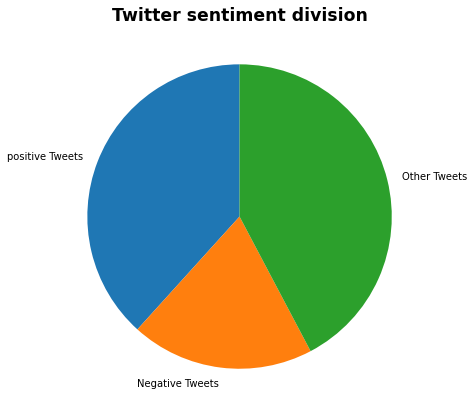

In [21]:
plt.figure(figsize = (7,7));
plt.title('Twitter sentiment division', fontsize = 'xx-large', fontweight = 'bold');
plt.pie(x, startangle= 90, labels = ['positive Tweets', 'Negative Tweets', 'Other Tweets']);